# Signal Template Matching

## 1-D case  

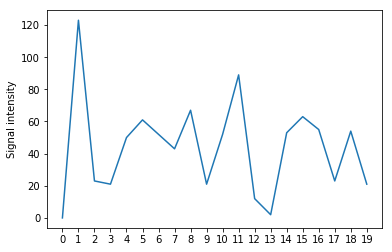

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def plot_discrete(discrete_signal, label = '', show = True):
    plt.plot(discrete_signal)
    plt.ylabel(label)
    plt.xticks(np.arange(0, len(discrete_signal), 1))
    if show:
        plt.show()    

# Input signal f(j)
input_signal = np.array([0, 123, 23, 21, 50, 61, 52, 43, 67, 21, 52, 89, 12, 2, 53, 63, 55, 23, 54, 21])
plot_discrete(input_signal, label='Signal intensity')


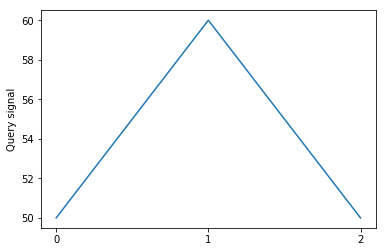

In [73]:
#Pattern signal h(j)
pattern_to_find = np.array([50, 60, 50])
plot_discrete(pattern_to_find, label='Query signal')


## How to detect pattern entries?
Note, there are two entries of signal  

In [74]:
print(pattern_to_find) 

[50 60 50]


at position 4 and 14: 

In [75]:
print(input_signal[4:7])

[50 61 52]


In [76]:
print(input_signal[14:17])

[53 63 55]


### 1. Bruteforce approach

Run search at every point. Let's start with $s(m) = \sum\limits_{k=0}^{2} [f(m + k) - h(k)] ^ 2 $ :

Run search at every poi

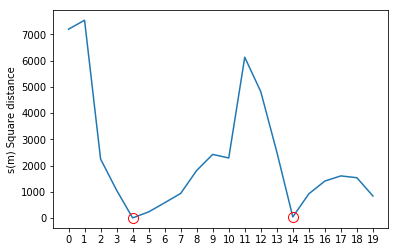

In [77]:
#Run search at every poi
h = pattern_to_find
f = input_signal
def sq(m):
    # residual length
    res = min(len(f)-m,len(h))
    return np.sum(np.square(f[m:m+res]-h[0:res]))

g_values = [sq(x) for x in range(len(f))]

plot_discrete(g_values, label='s(m) Square distance', show=False)
plt.plot(4, g_values[4], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.plot(14, g_values[14], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()


#### Problems?
1. Total number of calculations needed: $ O(|f|\cdot|h|) $ 
For instance, if signal $f$ has 10000 points and pattern $h$ is 100 points the will be roughly 
$ 100 \times 10000 $ summations and multiplications and even harder for 2-D case!
2. Signal is not normalized and not centered
3. Depends on scale.


### 2. Normalized Cross Correlation
First of all, let's take a look at the formula. 

$
 s(m) = \sum\limits_{k=0}^{2} [f(m + k) - h(k)] ^ 2 =
 \sum\limits_{k=0}^{2} f^2(m + k) - \sum\limits_{k=0}^{2} 2 f(m+k)h(k) + \sum\limits_{k=0}^{2} h^2(k)  
$

* $\sum\limits_{k=0}^{2} h^2(k)$ is constant  - ignore it
* $ \sum\limits_{k=0}^{2} f^2(m + k) $  - might be ignored if it's approximately constant

In other words, we might be interested only in "cross-correlation":

$ c(m) = \sum\limits_{k=0}^{2} f(m+k)h(k) $

Note: numpy has `np.correlate(f, h)` = $ c(m) $ 
Note: scipy has `scipy.signal.correlate(f, h)` = $ c(m) $ 

Let's plot it!


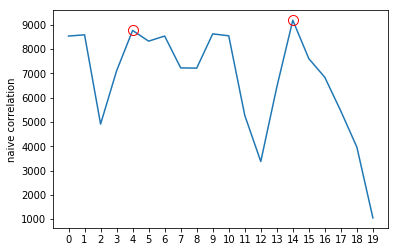

In [78]:

def cross_naive(m):
    # residual length
    res = min(len(f)-m,len(h))
    return np.dot(f[m:m+res], h[0:res])

naive_plot = [cross_naive(m) for m in range(len(f))]
plot_discrete(naive_plot, label='naive correlation', show=False)
plt.plot(4, naive_plot[4], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.plot(14, naive_plot[14], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()



Actual normalized cross-correlation $ \gamma(m) $ is given as: 

$ \gamma(m) =  \frac{\sum\limits_{k=0}^{2}\hat{f}_m(k) \times \hat{h}(k) }{ \lVert \hat{f}_m \rVert \times \lVert \hat{h} \rVert } $, where: 

$ \hat{h}(m) = h(m) - \frac{1}{3}\sum\limits_{k=0}^{2}h(k) $

$ \hat{f}_m(j) = f(m + j) - \frac{1}{3}\sum\limits_{k=0}^{2}f(m + k)  $.



C:\Anaconda\envs\p36dnn\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


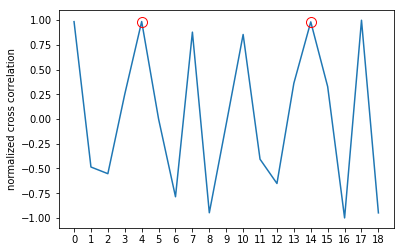

[array([-48.66666667,  74.33333333, -25.66666667]), array([ 67.33333333, -32.66666667, -34.66666667]), array([ -8.33333333, -10.33333333,  18.66666667]), array([-23.,   6.,  17.]), array([-4.33333333,  6.66666667, -2.33333333]), array([ 9.,  0., -9.]), array([ -2., -11.,  13.]), array([ -0.66666667,  23.33333333, -22.66666667]), array([ 20.33333333, -25.66666667,   5.33333333]), array([-33.,  -2.,  35.]), array([  1.,  38., -39.]), array([ 54.66666667, -22.33333333, -32.33333333]), array([-10.33333333, -20.33333333,  30.66666667]), array([-37.33333333,  13.66666667,  23.66666667]), array([-4.,  6., -2.]), array([ 16.,   8., -24.]), array([ 11., -21.,  10.]), array([ -9.66666667,  21.33333333, -11.66666667]), array([ 16.5, -16.5]), array([0.])]
[-3.33333333  6.66666667 -3.33333333]


In [89]:
h_hat = h - np.average(h)
def f_hat(m):
    res = min(len(f)-m,len(h))
    f_hat_window = f[m:m+res]
    return f_hat_window - np.average(f_hat_window)
    
def cross_corr_norm(m):
    f_hat_window = np.array(f_hat(m), dtype=float)
    h_hat_window = np.array(h_hat[0:len(f_hat_window)], dtype=float)
    return np.dot(f_hat_window, h_hat_window)/(np.linalg.norm(f_hat_window) * np.linalg.norm(h_hat_window))

normalized_cc_plot = [cross_corr_norm(m) for m in range(len(f))]
plot_discrete(normalized_cc_plot, label='normalized cross correlation', show=False)
plt.plot(4, normalized_cc_plot[4], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.plot(14, normalized_cc_plot[14], 'o', markeredgecolor='r', markerfacecolor='none', markersize=10)
plt.show()

print([f_hat(m) for m in range(len(f))])
print(h_hat)


##todo explain +2 peaks!


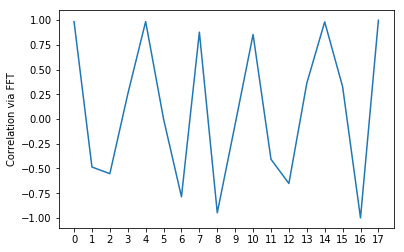

In [91]:
##via template_matching
from skimage.feature import match_template
f_2d = np.expand_dims(f, axis=0)
h_2d = np.expand_dims(h, axis=0)
result = match_template(f_2d, h_2d)[0]
plot_discrete(result, label='Correlation via FFT', show=True)
